# 2022-08-01 

In [1]:
dataset = pd.read_csv('/Users/user/Desktop/kibeomkim/080260-main/Chapter07/Social_Network_Ads.csv')

In [2]:
# 특성선별: 내가 풀려는 문제랑 관련있는 특성변수만 남기기. 
dataset = dataset.drop(columns=['User ID'])
dataset.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
import sklearn 
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()

enc.fit(dataset.iloc[:, [0]]) # gender 를 원핫 인코딩 벡터로 변환 
onehotlabels = enc.transform(dataset.iloc[:,[0]]).toarray() # 원핫 인코딩 벡터로 변환됨 
genders = pd.DataFrame({'femaile' : onehotlabels[:,0], 'male' : onehotlabels[:, 1]}) # gender 데이터프레임 생성. 1열: femaile, 2열: male
result = pd.concat([genders, dataset.iloc[:, 1:]], axis = 1 )

In [16]:
result.head()

,femaile,male,Age,EstimatedSalary,Purchased
0,0.0,1.0,19,19000,0
1,0.0,1.0,35,20000,0
2,1.0,0.0,26,43000,0
3,1.0,0.0,27,57000,0
4,0.0,1.0,19,76000,0


In [4]:
# 타깃변수: purchased 
y = result['Purchased']
# 특성변수
x = result.drop(columns='Purchased')

In [5]:
# 데이터 훈련용 셋 vs 테스트용 셋으로 분리 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) # 75%가 훈련용 셋에 포함. 

In [6]:
# 각 특성값들 정규화 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train = sc.fit(x_train)
x_test = sc.fit(x_test)

# --- 모델 투입 

In [30]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [34]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

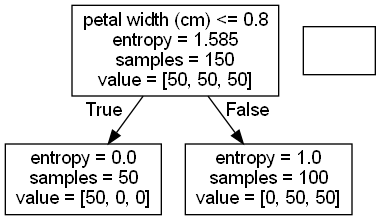

In [38]:
draw_decision_tree(tree1)

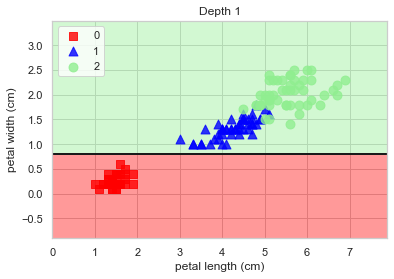

In [40]:
%matplotlib inline
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

In [21]:
# 의사결정나무 - 연습문제 1
# 1. 

from sklearn.datasets import load_iris 

data = load_iris()
y = data.target
x = data.data[:, [0, 1]]

from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x, y)
y_pred = tree2.predict(x)

from sklearn.metrics import accuracy_score 

print(accuracy_score(y, y_pred ))

0.8066666666666666


In [32]:
# 2. 
from sklearn.model_selection import cross_val_score

li = []
test_acc = []
for i in range(1, 10) : 
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0).fit(x, y)
    test_acc.append(accuracy_score(y, model.predict(x)))
    li.append(cross_val_score(model, x, y, scoring='accuracy', cv=5).mean()) 

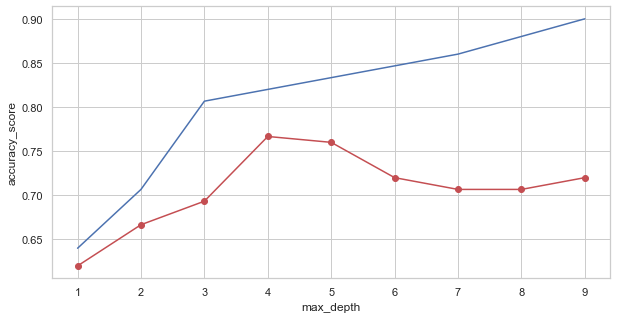

In [33]:
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.plot(range(1,10), li, 'ro-')
plt.plot(range(1, 10), test_acc, 'b')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.show()